# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Noel Schwibus

Datum: 19.11.2023

Gruppe: 45

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann man mit zwei einfachen Sensoren das Newtonsches Abkühlungsgesetz bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

In einem Glas befindet sich warmes Wasser und ein Temperatursensor. Ein zweiter Temperatursensor liegt auf dem Tisch und misst die Umbegungstemperatur.

Zu Beginn wird der Temperatursensor in das Wasser gegeben. Danach wird das Messprogramm gestartet. Nach etwa zehn Minuten wird das Messprogramm gestoppt.

![Newton](figures/Newton.jpg)

## Versuchsauswertung

In [48]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import h5py as h5
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [49]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = 'data/data_newton/data_newton.h5'
data_path = "data/data_newton"
# DONE #

In [50]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
s = h5.File(path,'r')
h = s["RawData"]
RawData = h["RawData"]

created = s.attrs["created"]
experiment = s.attrs["experiment"]
group_number = s.attrs["group_number"]
authors = s.attrs["authors"]

UUID = list(RawData.keys())
sensor1_path = "RawData/RawData/"+UUID[0]
sensor2_path = "RawData/RawData/"+UUID[1]

sensor1 = s[sensor1_path]
sensor2 = s[sensor2_path]

temp1 = list(sensor1["temperature"])
temp2 = list(sensor2["temperature"])

time1 = list(sensor1["time step"])
time2 = list(sensor2["time step"])

time1 = time1-time1[0]
time2 = time2-time2[0]
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'Temperatur logarithmisch in Grad Celsius')

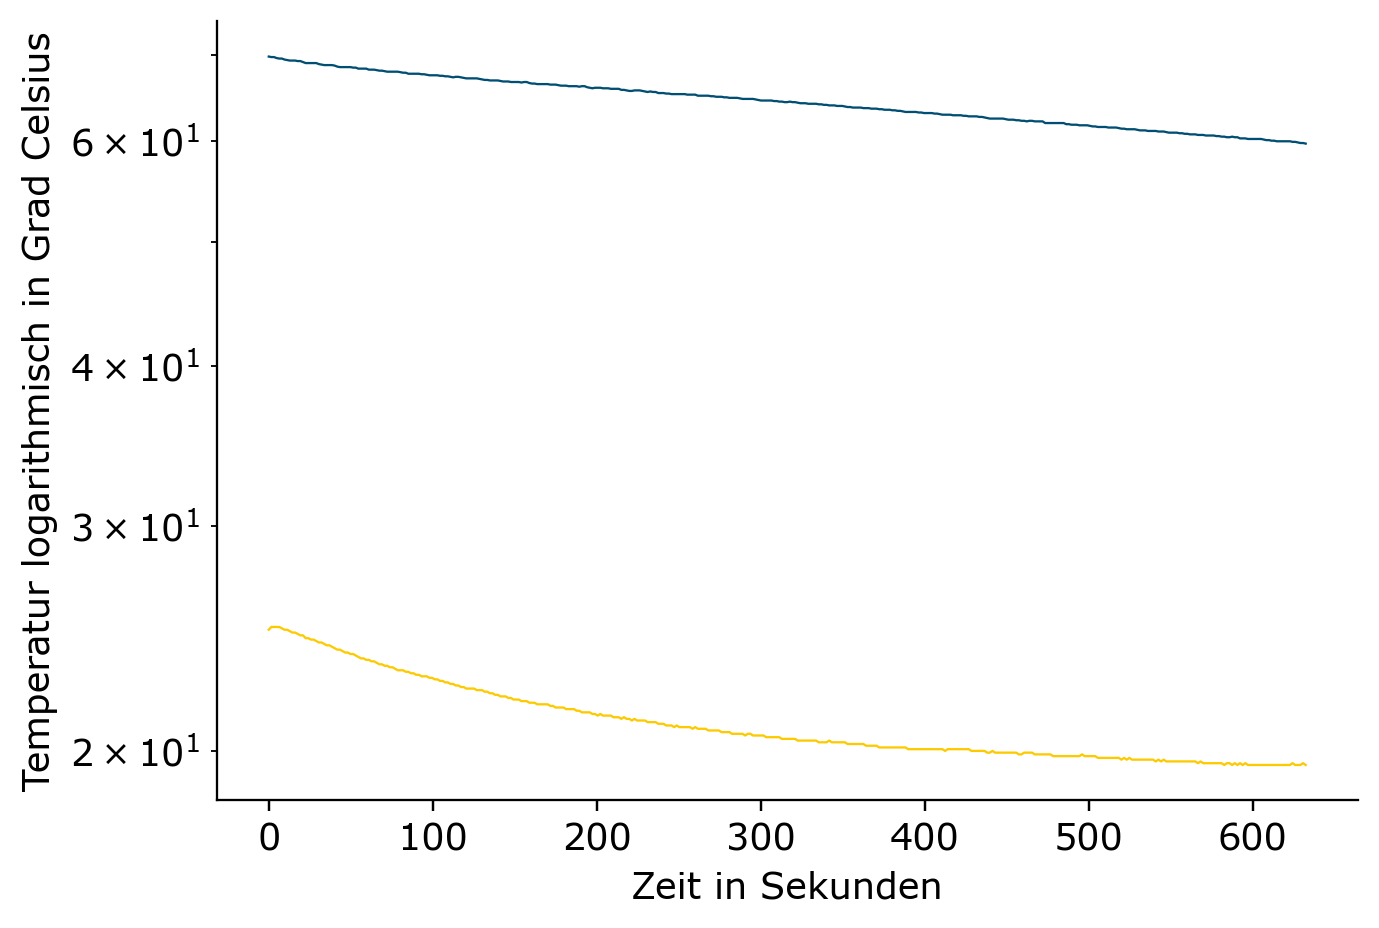

In [51]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
plt.semilogy(time1,temp1)
plt.semilogy(time2,temp2)

plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperatur logarithmisch in Grad Celsius")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [46]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = temp2[0]
T_2 = temp2[-1]
K = np.polyfit(time2, temp2 - T_2,0)
# DONE #

#### (iV) Ergebnis

In [47]:
# TODO: Print result
print(K)
# DONE #

[1.5306962]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Für die Konstante K ist ein plausiber Wert herausgekommen. Daraus kann geschlussfolgert werden, dass das Newtonsche Abkühlungsgesetz für den durchgeführten versuch gilt. Auch der Plot von kann der Temperatur im Glas zeigt den logerithmischen Zusammenhang zwischen Temperatur und Zeit.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch hat gut funktioniert und es ist ein schöner Plot herausgekommen. Ich habe gelernt mit Sensoren und dem raspberry pi umzugehen.